Samples (Alberto's sample, $H \rightarrow \chi\chi \rightarrow 4\mu$)
----
`MC_125_20_XXXmm.root`

XXX = [13, 130, 1300]


In [1]:
import pandas as pd
import numpy as np
import uproot

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
from collections import OrderedDict

trees = OrderedDict({
     13 : uproot.open('../Firefighter/washAOD/test/AlbertoSample/MC_125_20_13mm.root'  )['GEN/gen'],
    130 : uproot.open('../Firefighter/washAOD/test/AlbertoSample/MC_125_20_130mm.root' )['GEN/gen'],
   1300 : uproot.open('../Firefighter/washAOD/test/AlbertoSample/MC_125_20_1300mm.root')['GEN/gen']
})

In [ ]:
# for k, df in dfs.items():
#     df.columns = [x.decode() for x in df.columns]

In [10]:
trees[13].pandas.df(['pid'])

b'pid'
entry subentry         
0     0              21
      1              21
      2              35
      3         6000113
      4         6000113
      5              13
      6             -13
      7              13
      8             -13
1     0              21
      1              21
      2              35
      3         6000113
      4         6000113
      5              13
      6             -13
      7              13
      8             -13
2     0              21
      1              21
      2              35
      3         6000113
      4         6000113
      5              13
      6             -13
      7              13
      8             -13
3     0              21
      1              21
      2              35
...                 ...
27996 6             -13
      7              13
      8             -13
27997 0              21
      1              21
      2              35
      3         6000113
      4         6000113
      5              13
      6             -13
      7              13
      8             -13
27998 0              21
      1              21
      2              35
      3         6000113
      4         6000113
      5              13
      6             -13
      7              13
      8             -13
27999 0              21
      1              21
      2              35
      3         6000113
      4         6000113
      5              13
      6             -13
      7              13
      8             -13

[252000 rows x 1 columns]

# muon
## 1. pT, eta, phi

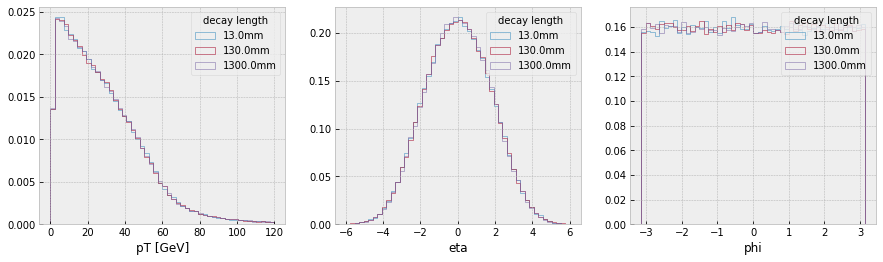

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

for k, t in trees.items():
    muons = np.abs(t.array('pid').content) == 13

    pt  = t.array('pt') .content[muons]
    eta = t.array('eta').content[muons]
    phi = t.array('phi').content[muons]
    ax[0].hist(pt,  bins=50, range=(0,120), histtype='step', label='%.1fmm'%k, density=True)
    ax[1].hist(eta, bins=50, range=(-6,6), histtype='step', label='%.1fmm'%k, density=True)
    ax[2].hist(phi, bins=50, histtype='step', label='%.1fmm'%k, density=True)

ax[0].set_xlabel('pT [GeV]')
ax[1].set_xlabel('eta')
ax[2].set_xlabel('phi')

for a in ax: a.legend(loc='best', title='decay length')

## 2. vxy, vz

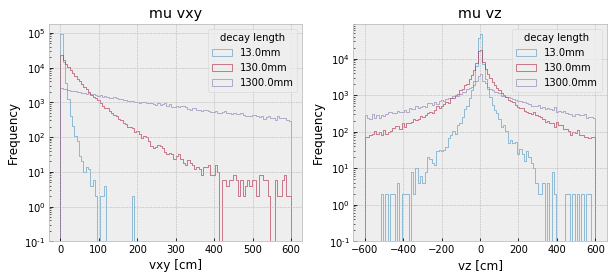

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for k, t in trees.items():
    mu = np.abs(t.array('pid').content) == 13
    
    muons = pd.DataFrame({'vxy': t.array('vxy').content[mu],
                          'vz' : t.array('vz') .content[mu]})
    
    muons['vxy'].plot.hist(bins=100, ax=ax[0], histtype='step', label='%.1fmm'%k, range=(0,600), title='mu vxy', log=True)
    muons['vz'] .plot.hist(bins=100, ax=ax[1], histtype='step', label='%.1fmm'%k, range=(-600,600), title='mu vz', log=True)

ax[0].set_xlabel('vxy [cm]')
ax[1].set_xlabel('vz [cm]')

for a in ax: a.legend(loc='best', title='decay length')

## 3. mupair invM, deltaR

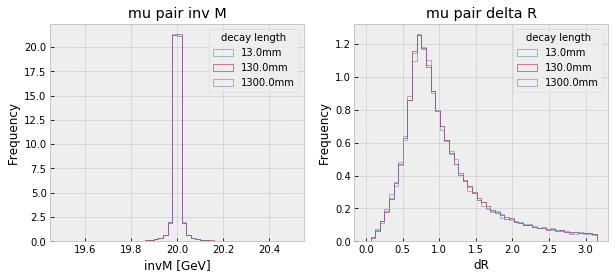

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

for k, t in trees.items():
    mp = t.array('pairPid').content == 13
    mupairs = pd.DataFrame({'pairInvM'  : t.array('pairInvM').content[mp],
                            'pairDeltaR': t.array('pairDeltaR').content[mp]})
    
    mupairs['pairInvM']  .plot.hist(bins=50, ax=ax[0], histtype='step', label='%.1fmm'%k, range=(19.5,20.5), title='mu pair inv M', density=True)
    mupairs['pairDeltaR'].plot.hist(bins=50, ax=ax[1], histtype='step', label='%.1fmm'%k, range=(0,3.15), title='mu pair delta R', density=True)

ax[0].set_xlabel('invM [GeV]')
ax[1].set_xlabel('dR')

for a in ax: a.legend(loc='best', title='decay length')

# $\chi$

## 1. pT, eta, phi

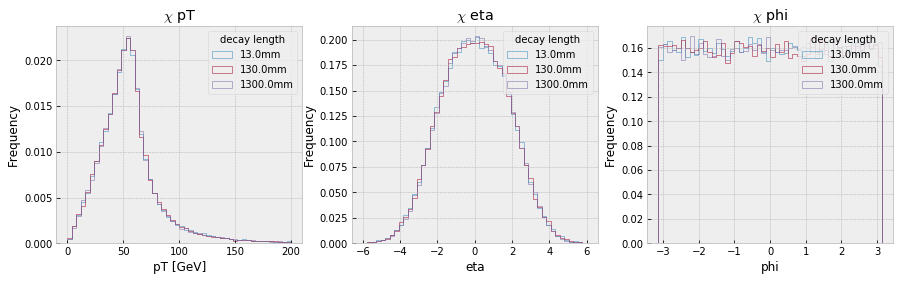

In [12]:
fig, ax = plt.subplots(1,3, figsize=(15,4))

for k, t in trees.items():
    df = t.pandas.df(["pid", "pt", "eta", "phi"])
    df.columns = [x.decode() for x in df.columns]
    dps = df.query('pid==6000113')
    
    dps['pt'] .plot.hist(bins=50, ax=ax[0], histtype='step', label='%.1fmm'%k, range=(0,200), title='$\chi$ pT', density=True)
    dps['eta'].plot.hist(bins=50, ax=ax[1], histtype='step', label='%.1fmm'%k, range=(-6,6), title='$\chi$ eta', density=True)
    dps['phi'].plot.hist(bins=50, ax=ax[2], histtype='step', label='%.1fmm'%k, title='$\chi$ phi', density=True)

ax[0].set_xlabel('pT [GeV]')
ax[1].set_xlabel('eta')
ax[2].set_xlabel('phi')

for a in ax: a.legend(loc='best', title='decay length')